In [18]:
# Dependencies
import pandas as pd
import json
import requests as req
import matplotlib.pyplot as plt
from random import uniform
from citipy import citipy
import time

In [33]:
def get_file_contents(filename):  
    try:
        with open(filename, 'r') as f:
            #file contains a single line with API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [21]:
# Save config information
api_key = get_file_contents("apiKey.txt")
units = "Imperial"
# generate the url
url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=" %(units, api_key)


Our API key is: 62605fb3e89660f7efc80a3e344e83cf


In [30]:
# define a function that randomly generates Lat & Lng coordinates
def newLatLng():
    return uniform(-90,90), uniform(-180, 180)
cities=[]
points = (newLatLng() for x in range(10000))
for point in points:
    lat, lng = point
    city = citipy.nearest_city(lat,lng)
    cities.append(city.city_name)


In [31]:
# get list of unique city names and save it to a DF
cities_list = list(set(cities))
city_df = pd.DataFrame(cities_list)
# Slect a sample of 500 cities
sample_city_df = city_df.sample(600)

sample_city_df = sample_city_df.rename(columns={0: "City"})
sample_city_df.reset_index(inplace=True)
sample_city_df = sample_city_df.drop(["index"], axis=1)


In [32]:
# create empty columns for all the data that you need from weatherapi call
sample_city_df["Cloudiness"] = ""
sample_city_df["Country"] = ""
sample_city_df["Date"] = ""
sample_city_df["Humidity"] = ""
sample_city_df["Lat"] = ""
sample_city_df["Lng"] = ""
sample_city_df["Max Temp"] = ""
sample_city_df["Wind Speed"] = ""

print("Beginning Data Retrieval")
print("-----------------------------")
# iterate over rows and save the data from weatherapi response to a dataframe
for index, row in sample_city_df.iterrows():
    # Error handling
    try:
        city_name = row["City"]
        target_url = url+ city_name
        weather_response = req.get(target_url).json()
        row["Cloudiness"] = weather_response["clouds"]["all"]
        row["Country"] = weather_response["sys"]["country"]
        row["Date"] = weather_response["dt"]
        row["Humidity"] = weather_response["main"]["humidity"]
        row["Lat"] = weather_response["coord"]["lat"]
        row["Lng"] = weather_response["coord"]["lon"]
        row["Max Temp"] = weather_response["main"]["temp_max"]
        row["Wind Speed"] = weather_response["wind"]["speed"]
    
        print("Processing Record %d  | %s" %(index, city_name))
        print(target_url)
    
    # If an error is encountered, move on with the next iteration of the loop
    except:
        continue  

Beginning Data Retrieval
-----------------------------
Processing Record 0  | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=batemans bay
Processing Record 1  | alice town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=alice town
Processing Record 2  | abay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=abay
Processing Record 3  | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=vestmanna
Processing Record 4  | price
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=price
Processing Record 5  | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=qaanaaq
Processing Record 6  | grindavik
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 65  | trofors
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=trofors
Processing Record 66  | grande prairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=grande prairie
Processing Record 67  | barre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=barre
Processing Record 68  | felipe carrillo puerto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=felipe carrillo puerto
Processing Record 69  | capoterra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=capoterra
Processing Record 70  | tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=tecoanapa
Processing Record 72  | reo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 127  | honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=honningsvag
Processing Record 128  | brezovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=brezovo
Processing Record 129  | ambunti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=ambunti
Processing Record 131  | yayva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=yayva
Processing Record 132  | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=pangkalanbuun
Processing Record 133  | brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=brigantine
Processing Record 134  | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e896

Processing Record 193  | goundam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=goundam
Processing Record 194  | hulan ergi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=hulan ergi
Processing Record 195  | lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=lagos
Processing Record 196  | guangyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=guangyuan
Processing Record 197  | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=alekseyevsk
Processing Record 198  | bahia blanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=bahia blanca
Processing Record 199  | shellbrook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3

Processing Record 254  | amalner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=amalner
Processing Record 255  | les cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=les cayes
Processing Record 256  | morro bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=morro bay
Processing Record 257  | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=touros
Processing Record 258  | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=port alfred
Processing Record 259  | salym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=salym
Processing Record 260  | pinyug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e34

Processing Record 317  | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=bubaque
Processing Record 318  | aracuai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=aracuai
Processing Record 319  | la paz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=la paz
Processing Record 320  | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=solnechnyy
Processing Record 321  | baglung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=baglung
Processing Record 322  | allende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=allende
Processing Record 324  | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e34

Processing Record 384  | ferrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=ferrol
Processing Record 385  | wareham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=wareham
Processing Record 386  | varnamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=varnamo
Processing Record 388  | san borja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=san borja
Processing Record 390  | tagusao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=tagusao
Processing Record 391  | vancouver
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=vancouver
Processing Record 392  | pasighat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e

Processing Record 451  | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=sechura
Processing Record 452  | arkhangelskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=arkhangelskoye
Processing Record 453  | xai-xai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=xai-xai
Processing Record 454  | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=clyde river
Processing Record 455  | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=bosaso
Processing Record 456  | shizuishan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=shizuishan
Processing Record 457  | uruguaiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605f

Processing Record 516  | goba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=goba
Processing Record 517  | havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=havelock
Processing Record 518  | huittinen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=huittinen
Processing Record 519  | itaquyry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=itaquyry
Processing Record 520  | christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=christchurch
Processing Record 521  | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=lata
Processing Record 522  | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344

Processing Record 584  | radishchevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=radishchevo
Processing Record 585  | porto-vecchio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=porto-vecchio
Processing Record 587  | marfino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=marfino
Processing Record 588  | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=rocha
Processing Record 589  | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=yulara
Processing Record 591  | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a3e344e83cf&q=yumen
Processing Record 592  | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62605fb3e89660f7efc80a

In [34]:
# filter missing data
final_sample_city_df = sample_city_df[sample_city_df["Country"] != ""]
# save it to a csv file
sample_city_df.to_csv("city_waether.csv")
# display the DF
final_sample_city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,batemans bay,0,AU,1513967978,100,-35.71,150.18,63.25,4.61
1,alice town,0,BS,1513967978,100,25.72,-79.3,75.36,6.55
2,abay,0,KZ,1513965600,83,49.63,72.87,-5.81,6.71
3,vestmanna,92,FO,1513966800,100,62.16,-7.17,48.2,19.46
4,price,1,US,1513965180,58,39.6,-110.81,24.8,8.05


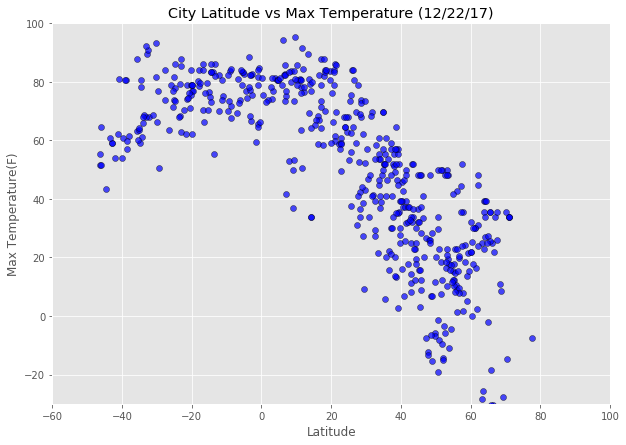

In [35]:
# Create a plot for Temperature (F) vs. Latitude
plt.figure(figsize=(10,7))
plt.style.use("ggplot")
plt.scatter(final_sample_city_df.Lat, final_sample_city_df["Max Temp"], color="b", edgecolors="black", alpha=0.7)
plt.xlim(-60, 100)
plt.ylim(-30,100)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature (%s)" %(time.strftime("%x")))
plt.show()

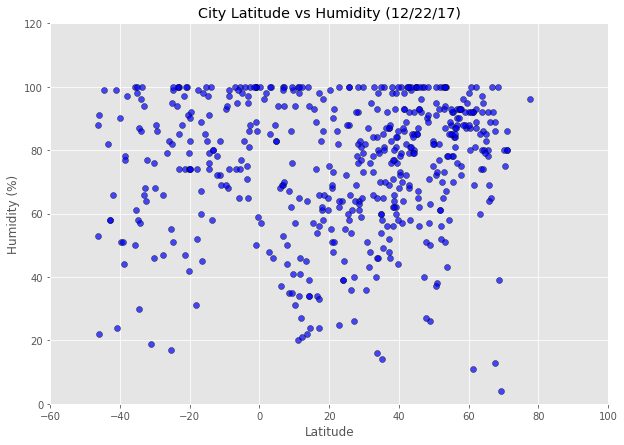

In [36]:
# Create a plot for Humidity (%) vs. Latitude
plt.figure(figsize=(10,7))
plt.style.use("ggplot")
plt.scatter(final_sample_city_df.Lat, final_sample_city_df["Humidity"], color="b", edgecolors="black", alpha=0.7)
plt.xlim(-60, 100)
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" %(time.strftime("%x")))
plt.show()

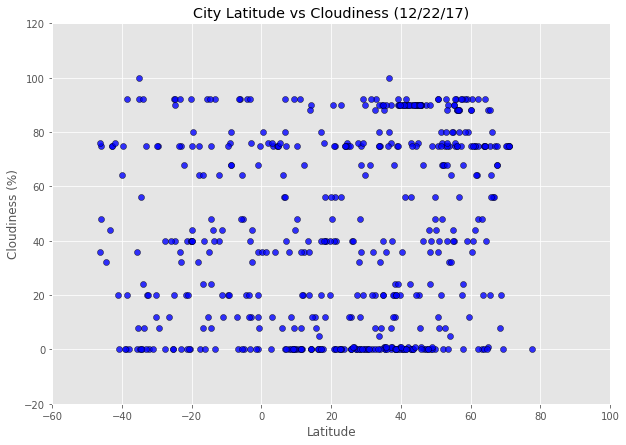

In [37]:
# Ctreate a plot for Cloudiness (%) vs. Latitude
plt.figure(figsize=(10,7))
plt.style.use("ggplot")
plt.scatter(final_sample_city_df.Lat, final_sample_city_df["Cloudiness"], color="b", edgecolors="black", alpha=0.8)
plt.xlim(-60, 100)
plt.ylim(-20,120)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" %(time.strftime("%x")))
plt.show()

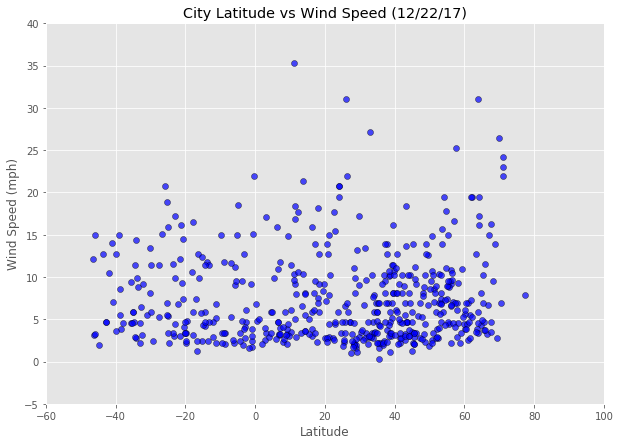

In [38]:
# create a plot for Wind Speed (mph) vs. Latitude
plt.figure(figsize=(10,7))
plt.style.use("ggplot")
plt.scatter(final_sample_city_df.Lat, final_sample_city_df["Wind Speed"], color="b", edgecolors="black", alpha=0.7)
plt.xlim(-60, 100)
plt.ylim(-5,40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" %(time.strftime("%x")))
plt.show()